### DATA PRE-PROCESSING & FEATURE SELECTION:

<h3>Data preprocessing</h3> is a crucial step in data analysis and machine learning. It involves a series of operations and techniques applied to raw data before it is used for analysis, modeling, or machine learning tasks. The primary objectives of data preprocessing are to clean, transform, and structure the data in a way that makes it suitable for the intended analysis or modeling process. Here are some common tasks involved in data preprocessing:

#### DATA PRE-PROCESSING SUMMARY:
* Ckeck Missing Value
* Convert categorical to numerical
* Check outliers & Impute outliers
* Feature transformation
* Feature scaling


<h3>Feature selection </h3> is a process in machine learning and data analysis that involves choosing a subset of the most relevant and informative features (variables or attributes) from a larger set of available features. The goal of feature selection is to improve the performance of a machine learning model or simplify data analysis by focusing on the most important characteristics of the data while discarding irrelevant or redundant ones.

#### FEATURE SELECTION SUMMARY:

* Drop unique & Constant Column
* Check correlation with heatmap & Remove highly correlated feature
* Check Duplicates 
* Principle component analysis
* Save pre-process data

<center><h1>IMPORT ALL NECCESSARY LIBRARY</h1></center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [3]:
path = "signal_path_loss_data.csv"
data = pd.read_csv(path)
pd.set_option('display.max_columns',None) # Used to display the all features

In [4]:
data.head()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,2171407026,368.853581,42.029355,2.287991,14.207688,rural,46.066300,NLOS,rainy,-3.337696,74850605.86,323.535247
1,2557607817,145.408870,27.104702,2.348117,19.149884,urban,4.217460,LOS,rainy,3.208956,32638686.66,302.101929
2,3581872487,60.766213,35.515670,3.815246,17.524410,urban,51.372558,LOS,rainy,-2.924875,58257317.08,306.735772
3,1868877541,206.794088,42.936580,5.319497,16.790897,urban,59.819078,LOS,rainy,-1.941350,67333241.06,319.448295
4,1119490401,186.455720,40.528642,9.723401,9.560728,suburban,54.458540,NLOS,clear,-2.907063,71146062.37,344.803098


In [5]:
data.tail()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
6754,1650232202,282.925846,2.033956,5.910539,14.073015,suburban,25.459578,LOS,rainy,-8.715335,65722337.70,277.918465
6755,5816265095,276.111922,17.641787,6.849947,16.075043,rural,21.660008,LOS,clear,4.430261,89629750.56,295.804923
6756,5872071319,488.043983,38.003737,6.347916,13.637978,suburban,89.033806,LOS,clear,-0.326245,83385812.75,330.944234
6757,1147596786,104.656770,46.507039,8.184545,14.869183,suburban,57.766908,LOS,foggy,1.778606,74720130.13,314.621889
6758,4916158459,53.857339,24.012735,8.559757,18.560756,urban,60.636588,LOS,rainy,3.791809,52779764.68,318.234863


### CHECK MISSING VALUE:

In [6]:
data.isnull().sum()

Frequency               0
Distance                0
Transmitter Height      0
Receiver Height         0
Antenna Gain            0
Environment             0
Obstacle Distance       0
Path Characteristics    0
Weather Conditions      0
Shadowing Effects       0
Frequency Bandwidth     0
Path Loss               0
dtype: int64

* Fom the given dataset, it is clear that There is no missing value present in the data.

### CONVERTING CATEGORICAL FEATURES TO NUMERICAL FEATURES

In [8]:
# Get all categorical feature list
list(data.select_dtypes('object'))

['Environment', 'Path Characteristics', 'Weather Conditions']

**Technique Used:**

**1.Mannual Encoding:** Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**2.Frequency Encoding:** Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

#### 1.Environment Norminal:  

In [9]:
# Get value counts of Environment
data.Environment.value_counts()

urban       2303
rural       2262
suburban    2194
Name: Environment, dtype: int64

In [10]:
# Use mannual encoding to map the labels
data.Environment = data.Environment.map({'urban':2,'rural':1, 'suburban':0,})

#### 2.Path Characteristics Norminal

In [11]:
# Get value counts of 'Path Characteristics'
data['Path Characteristics'].value_counts()

NLOS    3453
LOS     3306
Name: Path Characteristics, dtype: int64

In [12]:
# Use mannual encoding to map the labels
data['Path Characteristics'] = data['Path Characteristics'].map({'NLOS':1,'LOS':0})

#### 1.Weather Conditions Norminal:  

In [13]:
# Get value counts of Weather Conditions
data['Weather Conditions'].value_counts()

rainy    2287
foggy    2274
clear    2198
Name: Weather Conditions, dtype: int64

In [14]:
# Use mannual encoding to map the labels
data['Weather Conditions'] = data['Weather Conditions'].map({'rainy':2,'foggy':1, 'clear':0,})

In [15]:
# Check all data features 
data.head()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,2171407026,368.853581,42.029355,2.287991,14.207688,1,46.066300,1,2,-3.337696,74850605.86,323.535247
1,2557607817,145.408870,27.104702,2.348117,19.149884,2,4.217460,0,2,3.208956,32638686.66,302.101929
2,3581872487,60.766213,35.515670,3.815246,17.524410,2,51.372558,0,2,-2.924875,58257317.08,306.735772
3,1868877541,206.794088,42.936580,5.319497,16.790897,2,59.819078,0,2,-1.941350,67333241.06,319.448295
4,1119490401,186.455720,40.528642,9.723401,9.560728,0,54.458540,1,0,-2.907063,71146062.37,344.803098


### CHECK OUTLIERS AND IMPUTE OUTLIERS:

Outliers are data points in a dataset that significantly deviate from the rest of the data. They are data points that are unusually far from other data points and can have a substantial impact on statistical analyses and machine learning models. Identifying and handling outliers is an important step in data analysis and modeling.

Identification of Outliers:

There are several methods to identify outliers, including:

    * Visual Inspection: Plotting the data using box plots, scatter plots, or histograms to visually identify points that are far from the main cluster of data.

    * Statistical Methods: Using statistical techniques such as the Z-score or the IQR (Interquartile Range) method to identify data points that are statistically rare or extreme.

Impacts of Outliers:

Outliers can have various impacts on data analysis and modeling:

    * They can distort summary statistics like the mean and standard deviation.
    * They can affect the normality assumptions of statistical tests.
    * They can lead to biased or inaccurate machine learning models.
    
**BoxPlot:** Box plots will be use in this context.

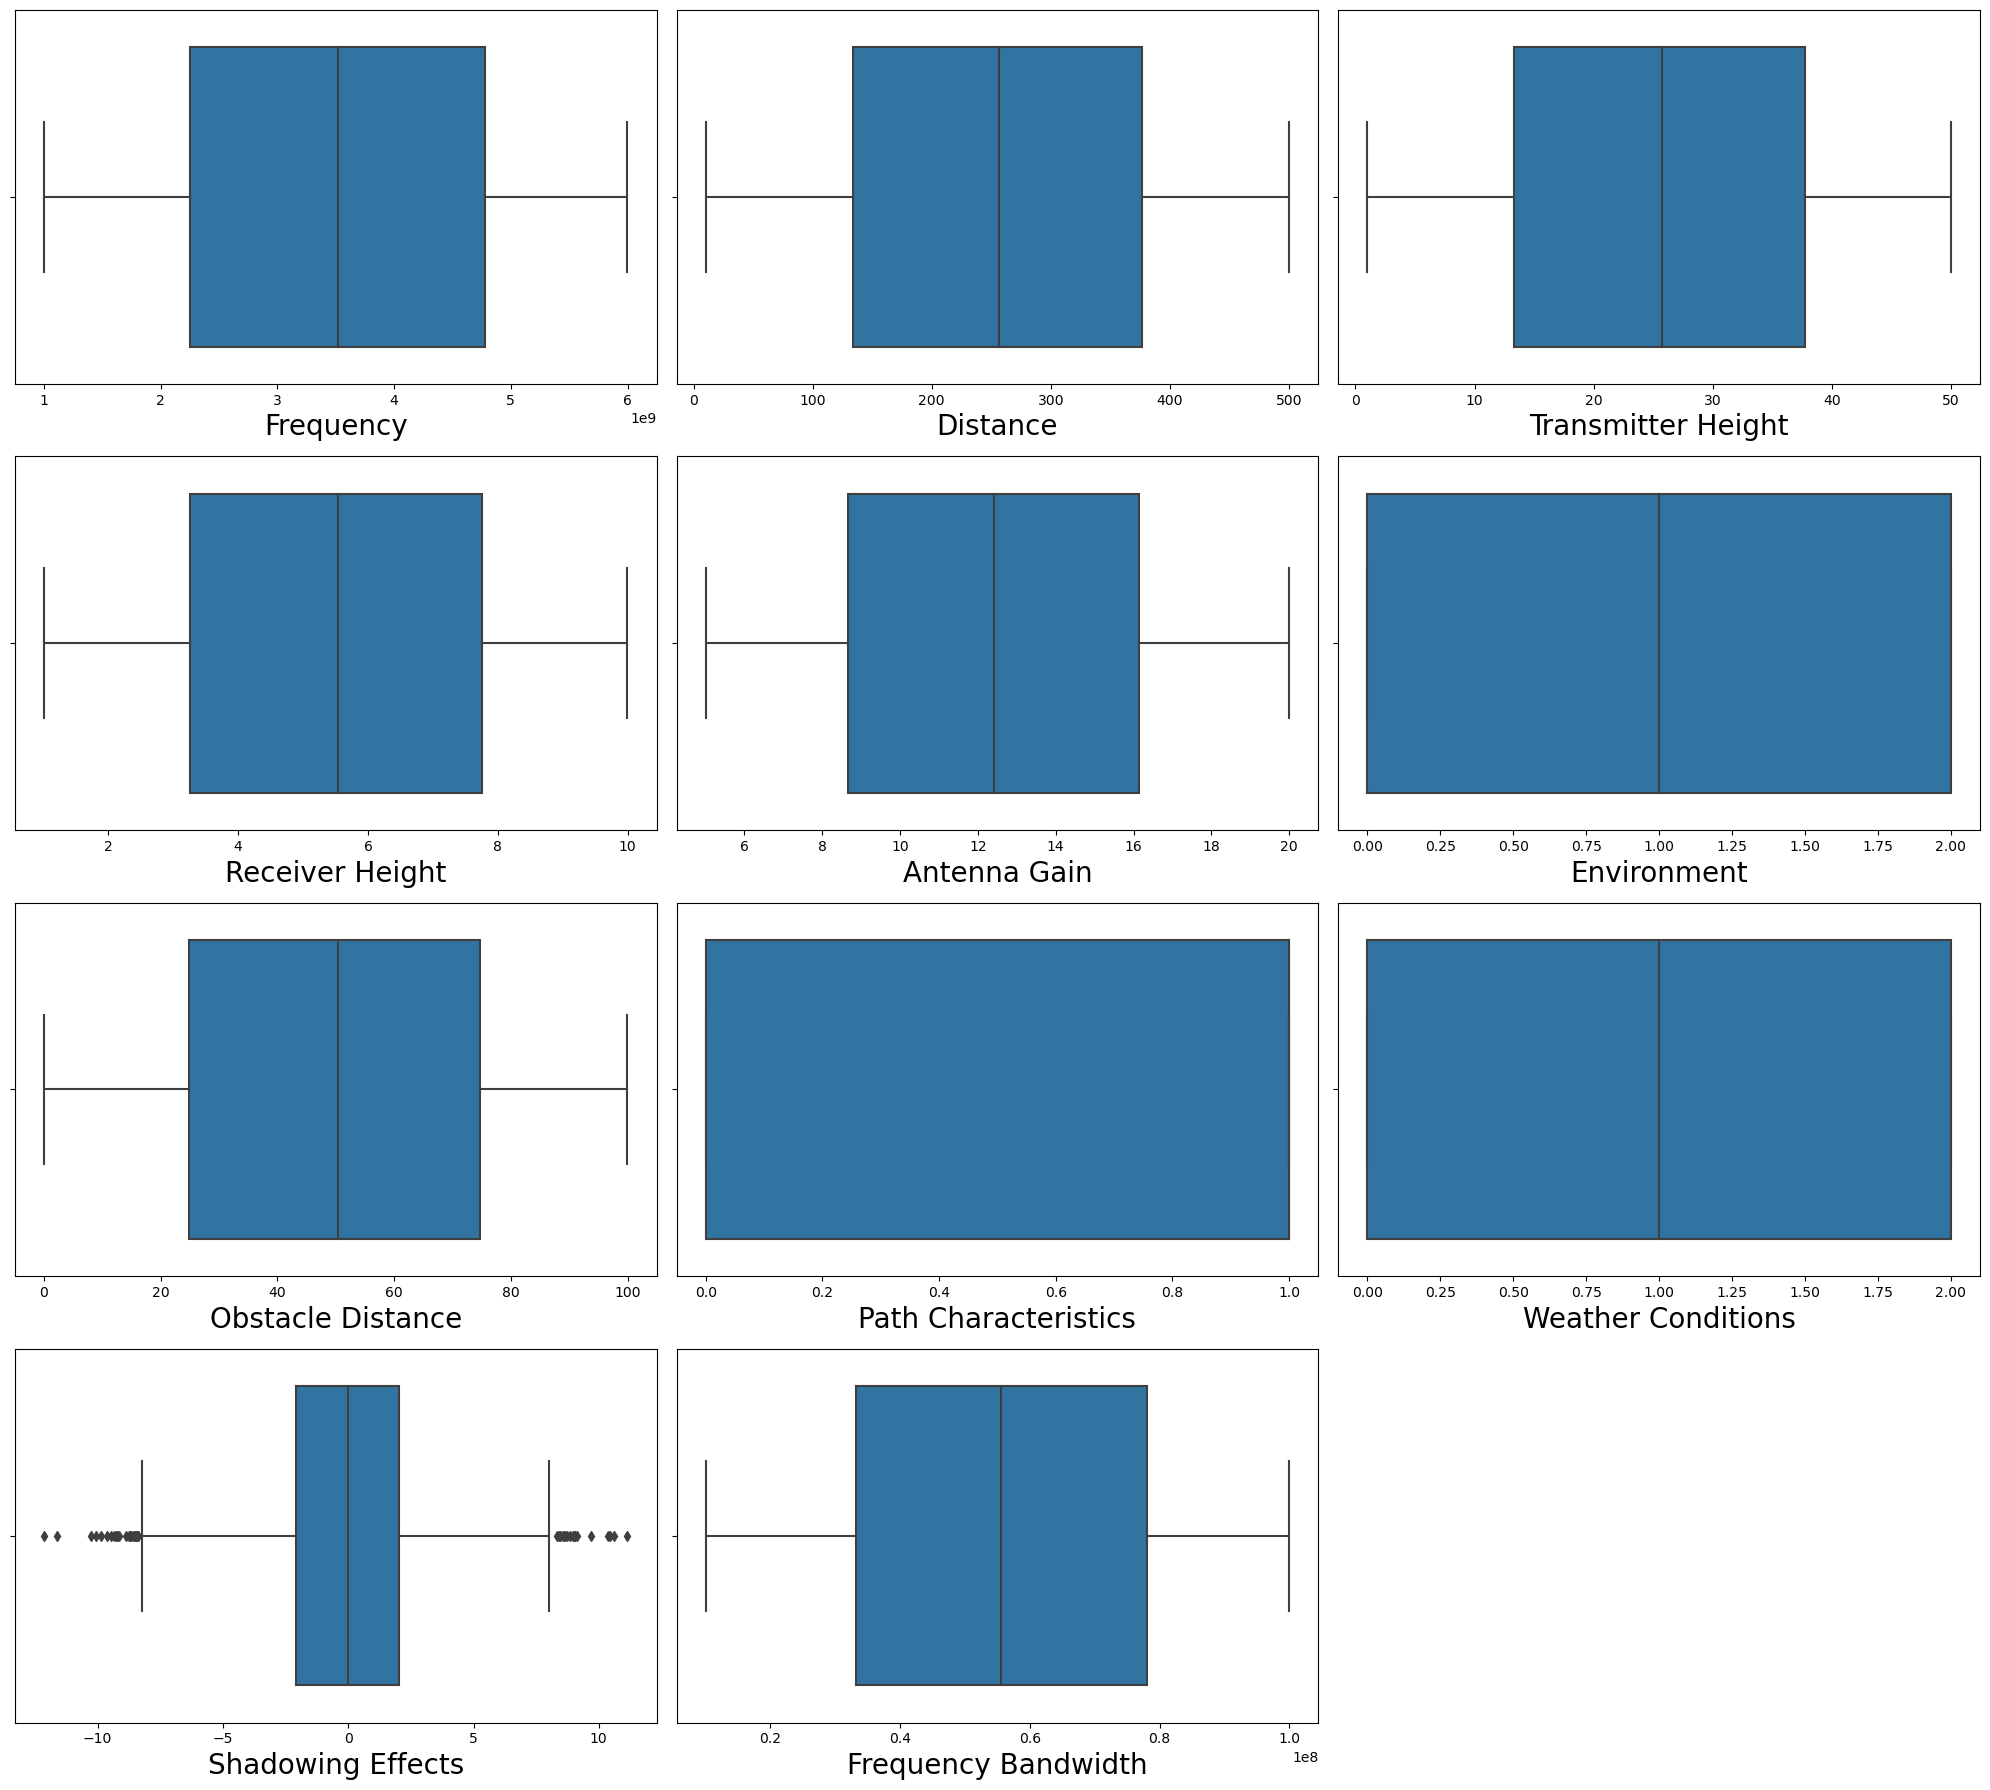

In [16]:
out = data[['Frequency','Distance','Transmitter Height','Receiver Height',
                   'Antenna Gain','Environment','Obstacle Distance',
                   'Path Characteristics','Weather Conditions','Shadowing Effects', 'Frequency Bandwidth']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


From the observations, we realized that there are outliers on :

* Shadowing Effects,

* Here we will use inter quatile range to impute the outlier, becuase data is not normally distributed.

**The Interquartile Range (IQR)** is a statistical measure used to describe the spread or dispersion of a dataset. It is a robust measure of variability because it is not sensitive to extreme values or outliers in the data. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a dataset. Here's how to calculate the IQR:

 **Calculate the First Quartile (Q1):**  Q1 is the 25th percentile of the data, meaning that 25% of the data points fall below Q1. To calculate Q1, you can sort the dataset in ascending order and find the value at the position (n + 1) / 4, where "n" is the number of data points.

**Calculate the Third Quartile (Q3):**  Q3 is the 75th percentile, meaning that 75% of the data points fall below Q3. To calculate Q3, find the value at the position (3 * (n + 1)) / 4 in the sorted dataset.

**Calculate the IQR:**  Subtract Q1 from Q3 to obtain the IQR.

Mathematically, the IQR is expressed as:

IQR = Q3 - Q1

The IQR is useful for several purposes:

   **Identifying Outliers:**  It is commonly used to identify outliers in a dataset. Data points that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are often considered outliers.



#### 1.Shadowing Effects

In [17]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['Shadowing Effects'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['Shadowing Effects'].quantile(0.25)
Q3 = data['Shadowing Effects'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 4.111369578000001
Minimum limit: -8.236507314
Maximum Limit: 8.208970998000002


In [18]:
# filtering data before imputation
data.loc[data['Shadowing Effects'] > max_limit]

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
7,1880494966,136.195963,32.354032,5.200134,16.147546,2,64.343266,0,0,9.067355,39609956.49,318.019766
1095,4194768976,347.103198,10.465637,2.580319,12.852652,0,23.797914,0,2,9.007361,87501062.13,314.846748
1207,5550250189,446.796475,8.094811,9.346446,14.078199,0,77.950399,1,1,8.595728,74516778.88,371.500619
1703,4841923258,354.899233,46.051713,5.066971,13.649627,0,88.751722,1,2,8.990620,28115464.88,370.767963
1817,5814150533,204.817944,3.411951,5.395175,16.698993,0,85.409360,0,0,8.434569,97077004.98,306.964927
1908,4267170382,402.165558,34.328926,8.413253,14.104245,1,74.372920,1,2,8.738768,64932362.76,354.099807
2089,4075496112,127.648534,31.808035,2.733463,7.533372,0,42.267473,1,1,8.350950,68309288.63,361.498049
2674,5626306805,422.993843,15.230725,7.336965,5.618478,1,28.280243,0,2,9.141366,16815839.08,312.103988
2829,2691953837,368.760973,37.363087,9.825985,11.879109,2,91.125141,1,1,9.687013,31141448.10,388.086434
2920,1144727909,317.512309,27.013864,6.247490,16.958329,1,59.070331,0,1,11.145581,89264532.38,305.356177


In [22]:
# Impute outlier
data.loc[data['Shadowing Effects'] > max_limit,'Shadowing Effects']=data['Shadowing Effects'].median()

In [23]:
# filtering data after imputation
data.loc[data['Shadowing Effects'] > max_limit]

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss


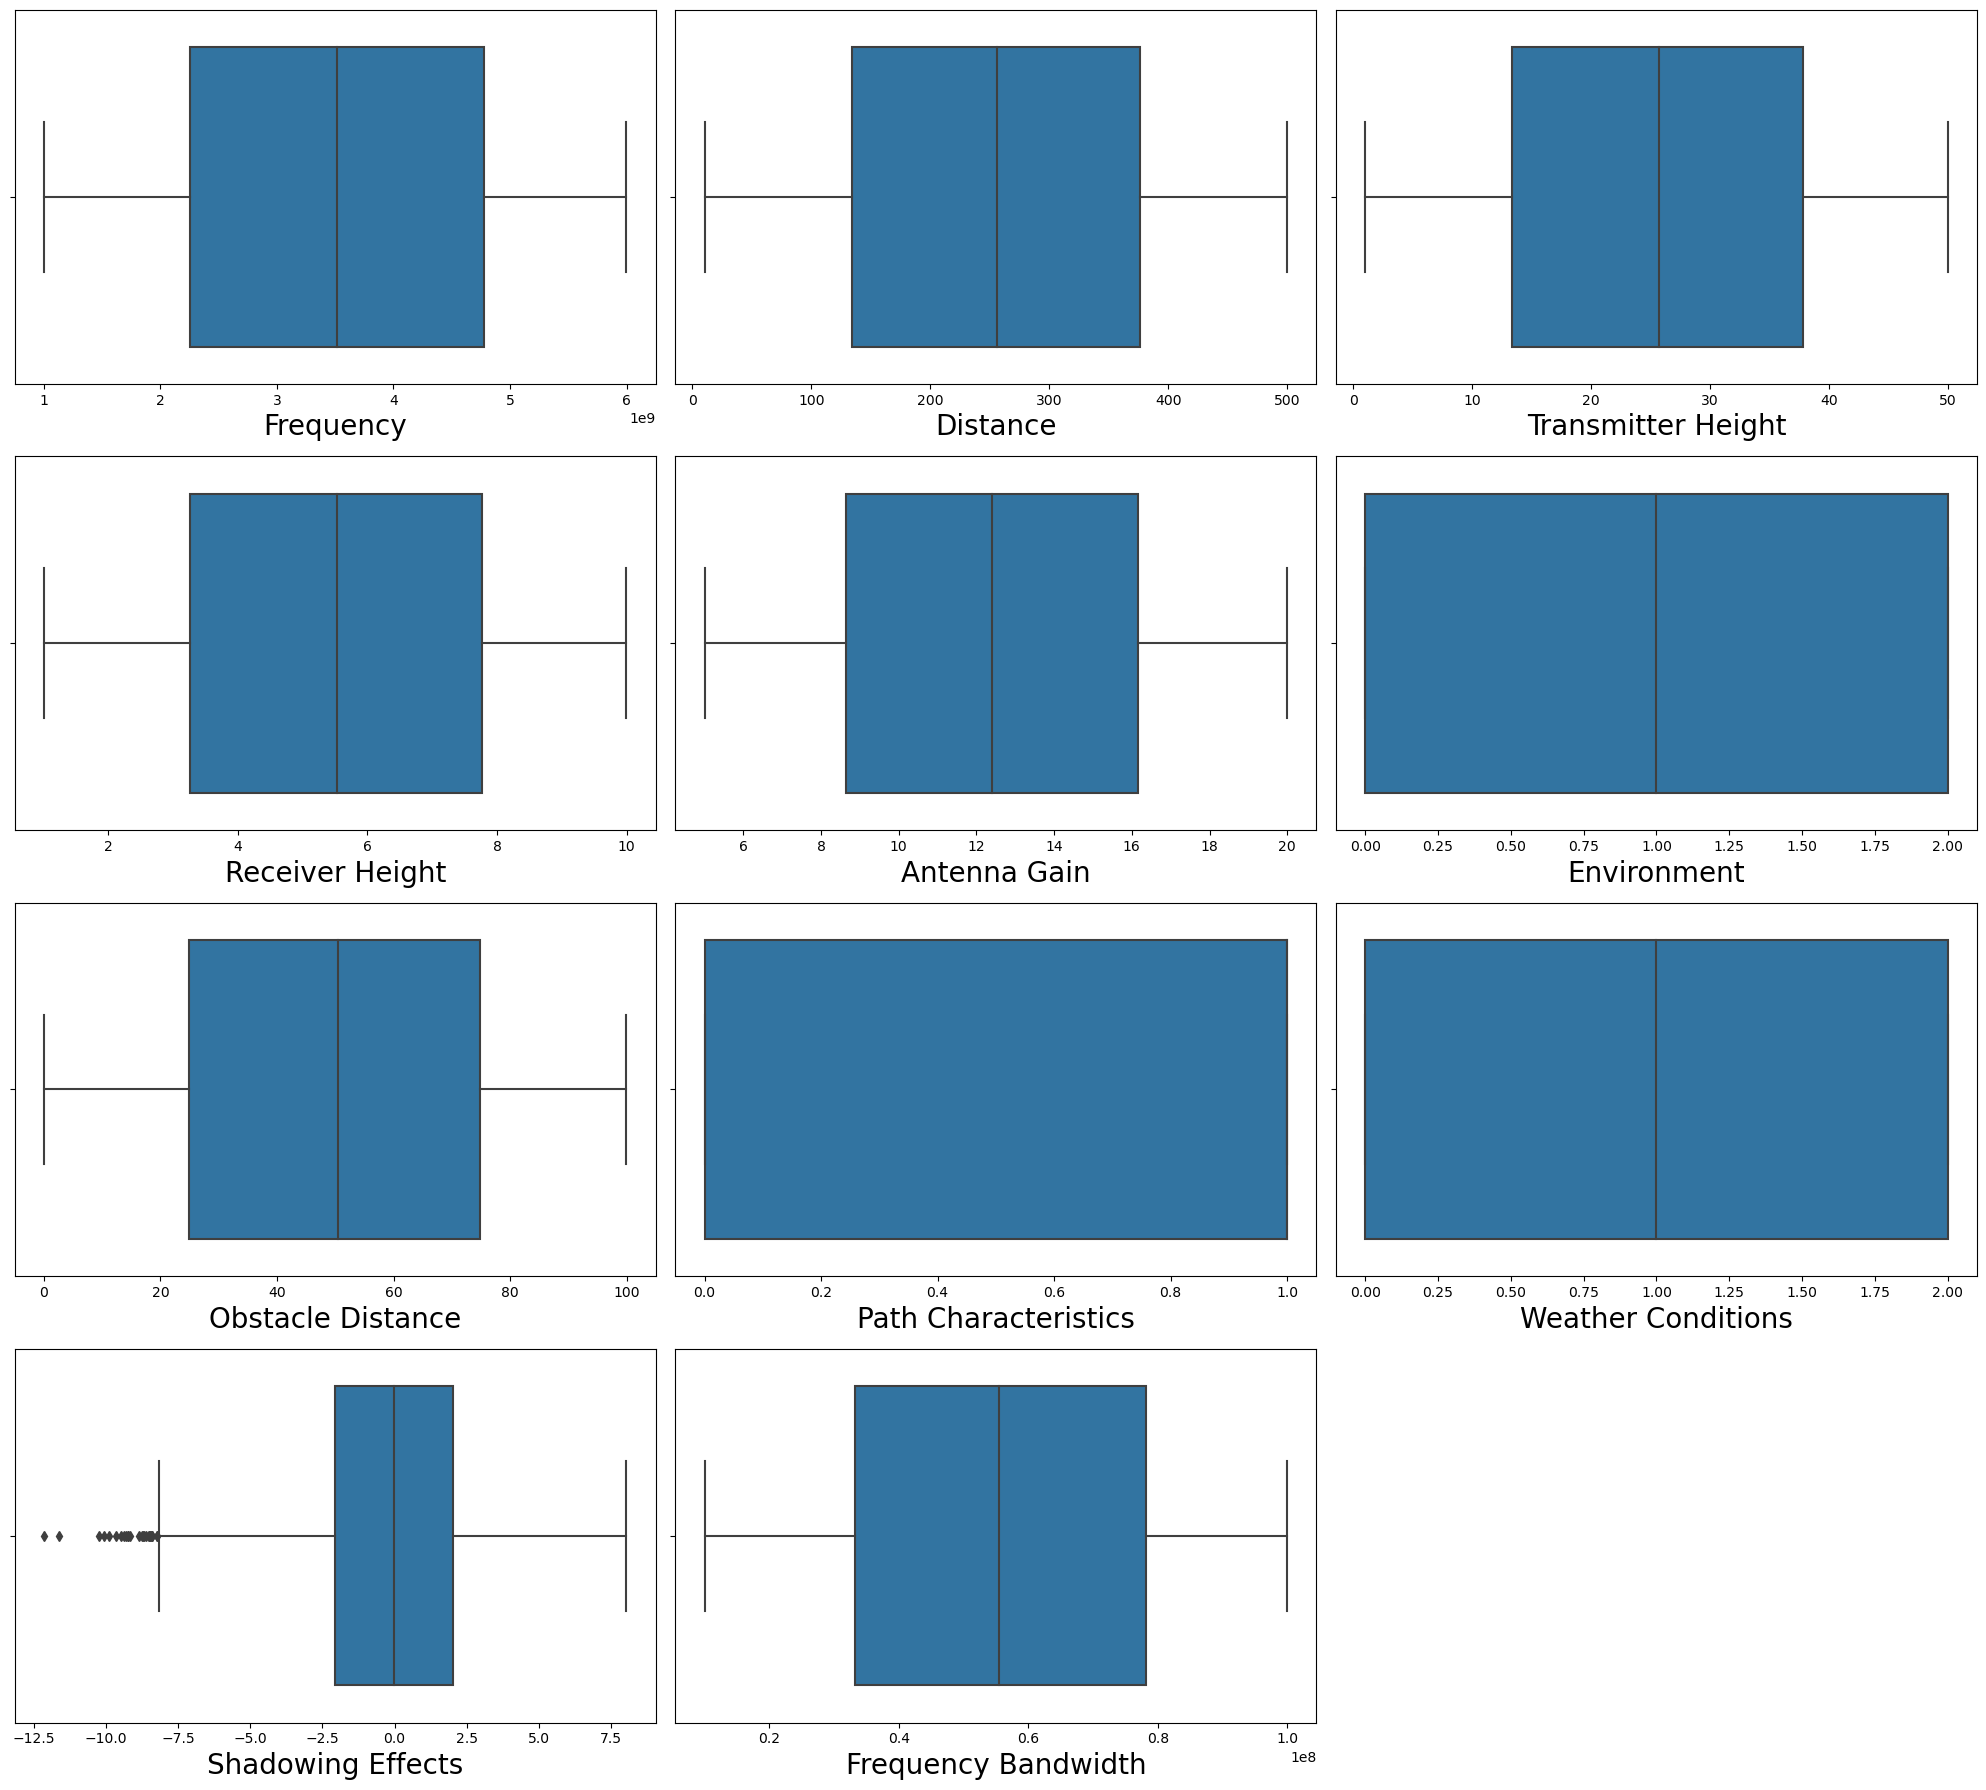

In [24]:
out = data[['Frequency','Distance','Transmitter Height','Receiver Height',
                   'Antenna Gain','Environment','Obstacle Distance',
                   'Path Characteristics','Weather Conditions','Shadowing Effects', 'Frequency Bandwidth']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### FEATURE SCALING THE DATA

**Feature scaling** is a data preprocessing technique used in machine learning to ensure that all the features (variables) in a dataset have a similar scale or range. The goal of feature scaling is to standardize or normalize the values of the features so that they don't dominate or bias the learning algorithm due to differences in their original measurement units.

**Min-Max Scaling (Normalization):** This method scales the values of each feature to a specific range, typically between 0 and 1. The formula for Min-Max scaling is:

Xscaled=(X−Xmin)/(Xmax−Xmin)Xs​caled=(X−Xm​in)/(Xm​ax−Xm​in)

**Z-Score Standardization:** Z-score scaling transforms the data such that it has a mean of 0 and a standard deviation of 1. It's often used when the data follows a normal distribution. The formula for Z-score scaling is:

Z=(X−μ)/σZ=(X−μ)/σ

In [25]:
# Check all data features 
data.head()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,2171407026,368.853581,42.029355,2.287991,14.207688,1,46.066300,1,2,-3.337696,74850605.86,323.535247
1,2557607817,145.408870,27.104702,2.348117,19.149884,2,4.217460,0,2,3.208956,32638686.66,302.101929
2,3581872487,60.766213,35.515670,3.815246,17.524410,2,51.372558,0,2,-2.924875,58257317.08,306.735772
3,1868877541,206.794088,42.936580,5.319497,16.790897,2,59.819078,0,2,-1.941350,67333241.06,319.448295
4,1119490401,186.455720,40.528642,9.723401,9.560728,0,54.458540,1,0,-2.907063,71146062.37,344.803098


In [26]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Frequency','Distance','Transmitter Height','Antenna Gain','Obstacle Distance',
      'Frequency Bandwidth']]  =  scalar.fit_transform(data[['Frequency','Distance','Transmitter Height',
      'Antenna Gain','Obstacle Distance','Frequency Bandwidth']])

In [27]:
data.head()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,-0.922958,0.806954,1.161332,2.287991,0.405137,1,-0.135735,1,2,-3.337696,0.745769,323.535247
1,-0.656495,-0.781722,0.106674,2.348117,1.547360,2,-1.580798,0,2,3.208956,-0.876353,302.101929
2,0.050207,-1.383525,0.701039,3.815246,1.171686,2,0.047493,0,2,-2.924875,0.108121,306.735772
3,-1.131692,-0.345277,1.225441,5.319497,1.002159,2,0.339156,0,2,-1.941350,0.456892,319.448295
4,-1.648739,-0.489882,1.055283,9.723401,-0.668851,0,0.154053,1,0,-2.907063,0.603411,344.803098


### FEATURE SELECTION

**Feature selection** is a critical step in data preprocessing and machine learning. It involves choosing a subset of relevant features (variables or attributes) from a larger set of available features. The primary goal of feature selection is to improve model performance, reduce overfitting, and simplify the model while retaining the most important information.


Importance of Feature Selection:

    <h3>Dimensionality Reduction:</h3> By selecting a subset of features, you reduce the dimensionality of the dataset. This is particularly valuable when dealing with high-dimensional data, as it can improve model training and performance.

    Improved Model Performance: Removing irrelevant or redundant features can enhance the performance of machine learning models by reducing noise and focusing on the most informative variables.

    Interpretability: Simplifying models by using fewer features can make them more interpretable and easier to explain.

    Efficiency: Reducing the number of features can make the model training process faster and require less memory.

#### CHECKING FOR CORRELATION

**Correlation**  is a statistical measure that quantifies the extent to which two or more variables are related or associated with each other. It helps to identify and measure the strength and direction of the relationship between variables. 


**Heatmap:** A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.


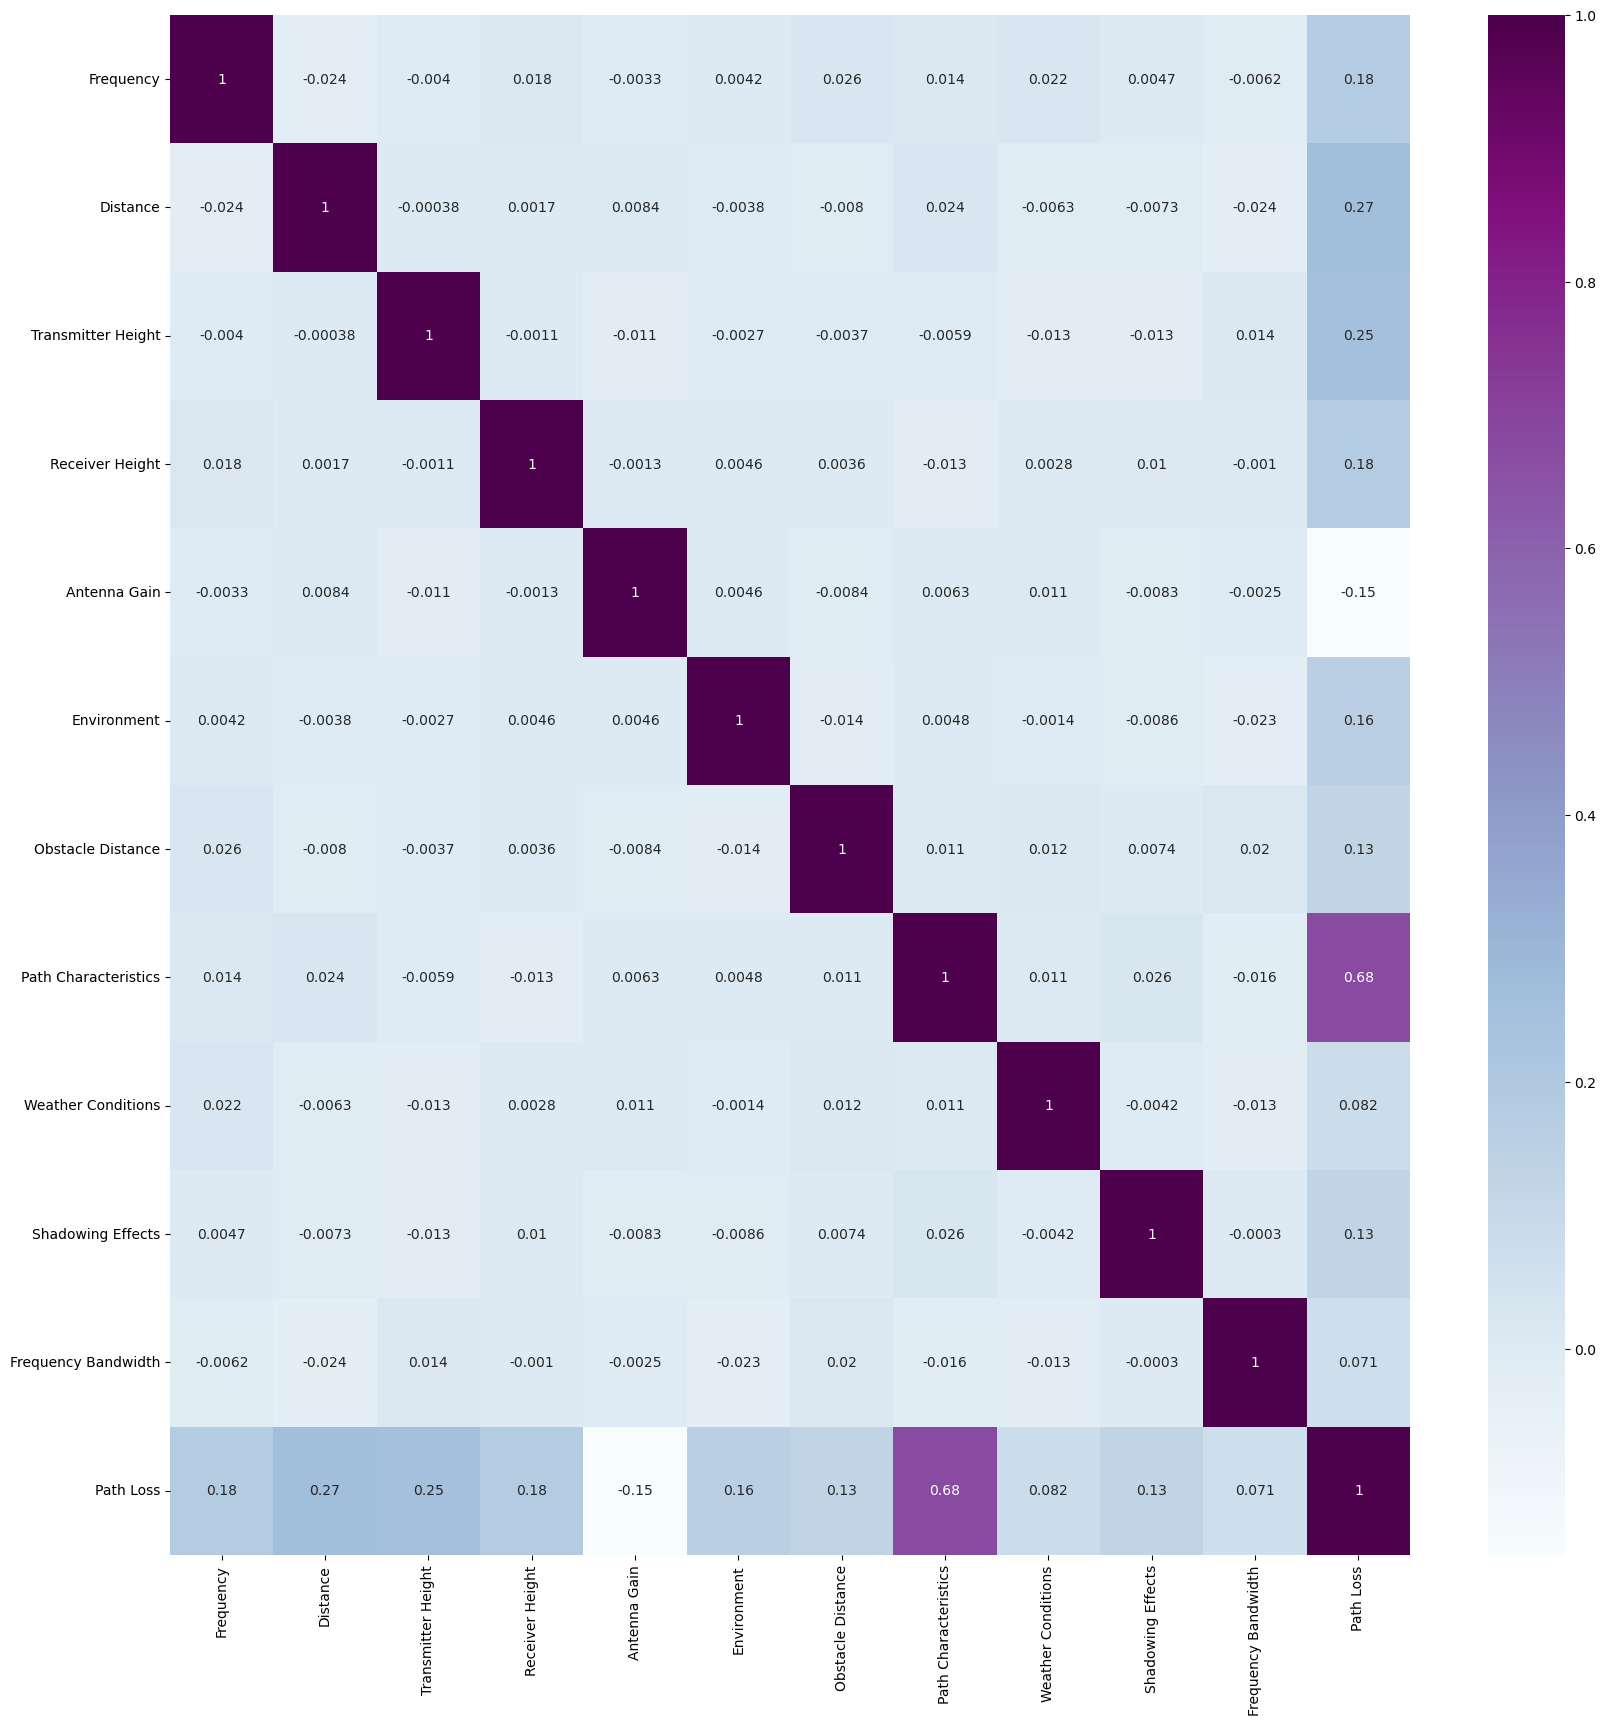

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

1 * From above heatmap scale we are clearly seen the their is no highly correlated feature in data

2 * But we confirm with the help of simple code



In [29]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* Now we confirm their is no highly correlated feature is present.

#### CHECKING DUPLICATES

In [30]:
data.duplicated().sum()

0

* Their is no Duplicates is present in data.

In [32]:
data.to_csv('clean_data.csv')